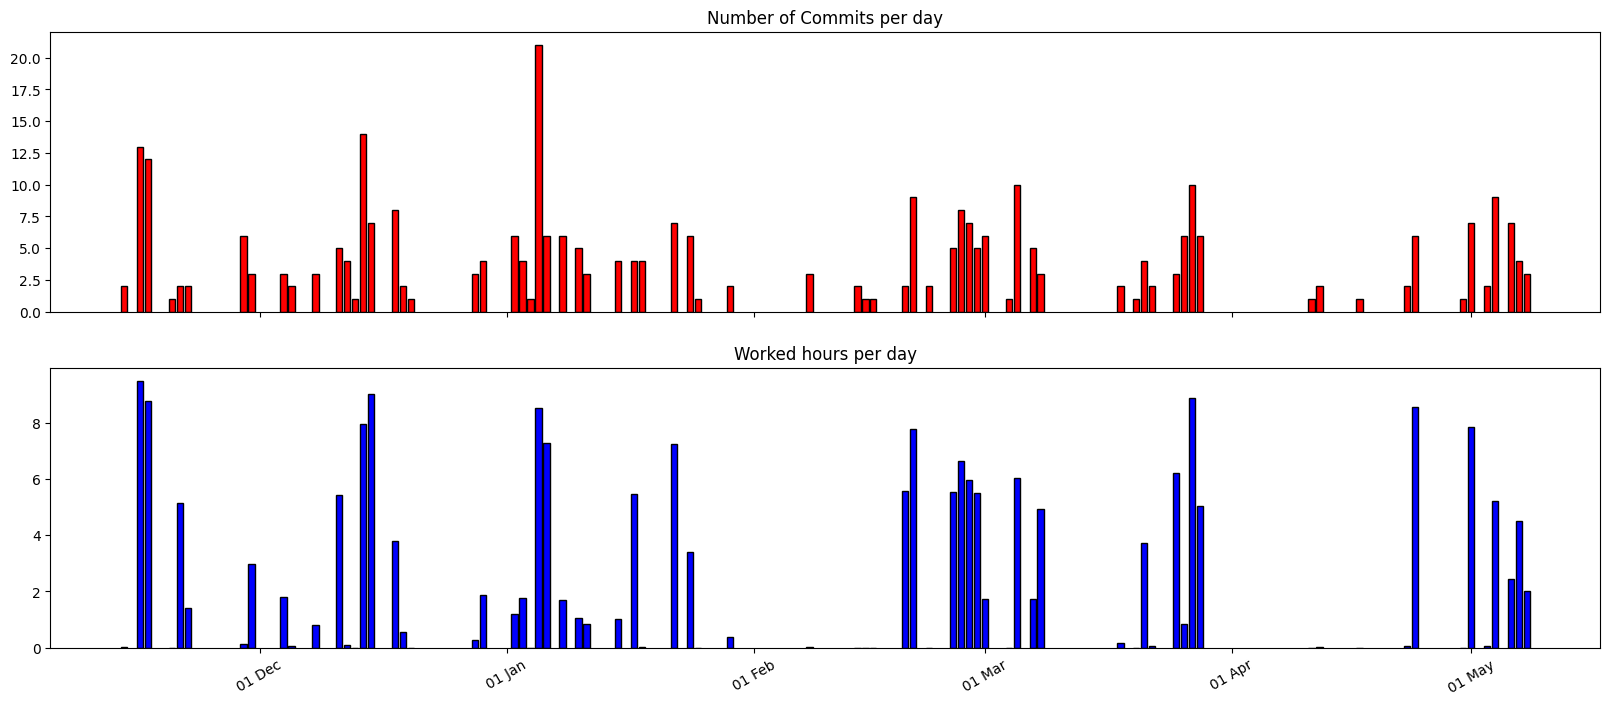

In [6]:

import import_ipynb
from daily_commits import daily_commits
from history_to_day_duration import hours_per_day


from matplotlib import pyplot as plt
import matplotlib.dates as mdates
date_format = '%d %b'

_df = daily_commits()

fig, ax  = plt.subplots(2, figsize=(20,8), sharex=True)

ax[0].tick_params(axis='x', labelsize=10, rotation=30)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter(date_format))
bc=ax[0].bar(_df.index,_df.commits , color="red", width=0.8, edgecolor="black")
ax[0].set_title("Number of Commits per day")



_df = hours_per_day()


ax[1].tick_params(axis='x', labelsize=10, rotation=30)
ax[1].xaxis.set_major_formatter(mdates.DateFormatter(date_format))
ax[1].set_title("Worked hours per day")
contbc=ax[1].bar(_df.index,_df , color="blue", width=0.8, edgecolor="black")
